# Analysis of Energy Consumption Optimization

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os
import numpy as np
import pickle
import utils
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import sqlite3
import pandas as pd
from ax.utils.notebook.plotting import render, init_notebook_plotting
from ax.plot.contour import plot_contour
from ax.modelbridge.factory import get_GPEI

sns.set(style="whitegrid")
sns.set_context("paper")

palette = [
    sns.color_palette()[-1],
    sns.color_palette()[-2],
    sns.color_palette()[0],
    sns.color_palette()[1],
    sns.color_palette()[2],
]

<IPython.core.display.Javascript object>

In [3]:
data_dir = "data/exp_50/"

<IPython.core.display.Javascript object>

In [4]:
# bayesian optimization
with open(f"{data_dir}experiment.pkl", "rb") as f:
    bo_best_param, values, experiment = pickle.load(f)

    bo_trials = np.array(
        [[trial.objective_mean for trial in experiment.trials.values()]]
    )[0]
    bo_best_E = values[0]["ec"]

<IPython.core.display.Javascript object>

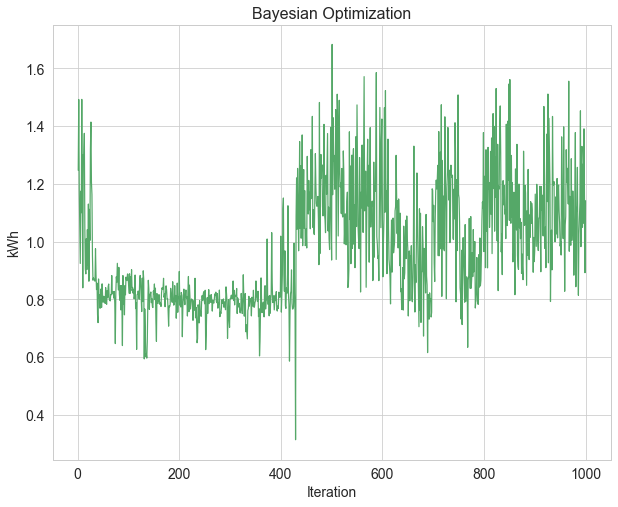

<IPython.core.display.Javascript object>

In [5]:
# Bayesian Optimization
x = np.arange(1, len(bo_trials) + 1)
plt.figure(figsize=(10, 8))
plt.title("Bayesian Optimization", fontsize=16)

plt.plot(x, bo_trials, color=sns.color_palette()[2])
# plt.xlim(1, 1000)
plt.tick_params(axis="both", which="major", labelsize=14)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("kWh", fontsize=14)
plt.savefig("learning_bo.pdf", format="pdf")
plt.show()

In [6]:
print(bo_trials)

[1.24700443 1.49212258 1.1825794  1.05979453 0.92454879 1.17479379
 1.10017339 1.49259386 1.10915325 0.84019711 1.30127049 1.30100065
 1.37503519 1.04393607 0.90503275 0.88846831 1.01032292 0.90320036
 1.04166107 0.91868199 1.13022978 0.86302871 1.11172715 1.00420689
 1.32165958 1.4140784  1.20642039 1.16298972 0.9505846  0.86645801
 0.87454247 0.86951428 0.86796208 0.86318417 0.97559867 0.88545446
 0.83408335 0.85645871 0.74711326 0.71969743 0.87086143 0.80350351
 0.81688485 0.76947106 0.81515272 0.83647276 0.77241674 0.85400072
 0.81017014 0.79028074 0.81097936 0.80954607 0.79928097 0.78639565
 0.84094921 0.78831994 0.78317539 0.83037799 0.80631717 0.84563724
 0.85332908 0.80167733 0.79679733 0.79474563 0.81715675 0.81605451
 0.88274763 0.81936522 0.82505132 0.82740518 0.80458024 0.82773897
 0.78558218 0.64720787 0.82103992 0.87838089 0.85963435 0.92505217
 0.87452501 0.83279731 0.91091119 0.81855633 0.79703597 0.84716388
 0.76360087 0.8479441  0.78342083 0.64028086 0.88268749 0.7847

<IPython.core.display.Javascript object>

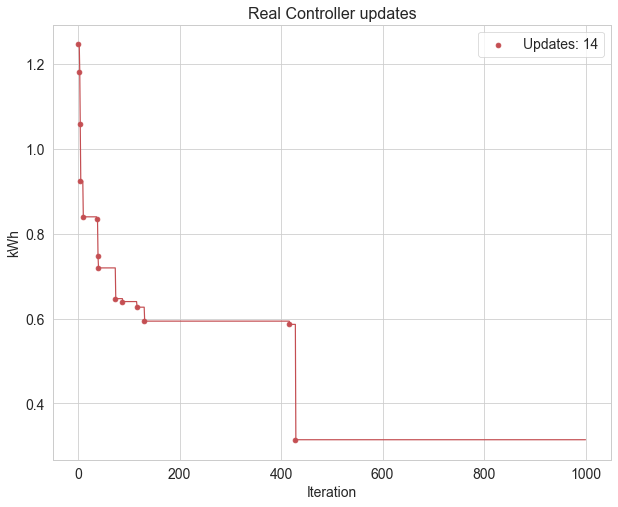

<IPython.core.display.Javascript object>

In [7]:
x = np.arange(1, len(bo_trials) + 1)
plt.figure(figsize=(10, 8))
plt.title("Real Controller updates", fontsize=16)

cumul_min = np.minimum.accumulate(bo_trials)
updates, idxs = np.unique(cumul_min, return_index=True)
plt.plot(x, cumul_min, color=sns.color_palette()[3])
plt.scatter(idxs, updates, color="r", label=f"Updates: {len(updates)}")
plt.tick_params(axis="both", which="major", labelsize=14)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("kWh", fontsize=14)
plt.legend(fontsize=14)
plt.savefig("cumulsum.pdf", format="pdf")
plt.show()

In [8]:
print(cumul_min)

[1.24700443 1.24700443 1.1825794  1.05979453 0.92454879 0.92454879
 0.92454879 0.92454879 0.92454879 0.84019711 0.84019711 0.84019711
 0.84019711 0.84019711 0.84019711 0.84019711 0.84019711 0.84019711
 0.84019711 0.84019711 0.84019711 0.84019711 0.84019711 0.84019711
 0.84019711 0.84019711 0.84019711 0.84019711 0.84019711 0.84019711
 0.84019711 0.84019711 0.84019711 0.84019711 0.84019711 0.84019711
 0.83408335 0.83408335 0.74711326 0.71969743 0.71969743 0.71969743
 0.71969743 0.71969743 0.71969743 0.71969743 0.71969743 0.71969743
 0.71969743 0.71969743 0.71969743 0.71969743 0.71969743 0.71969743
 0.71969743 0.71969743 0.71969743 0.71969743 0.71969743 0.71969743
 0.71969743 0.71969743 0.71969743 0.71969743 0.71969743 0.71969743
 0.71969743 0.71969743 0.71969743 0.71969743 0.71969743 0.71969743
 0.71969743 0.64720787 0.64720787 0.64720787 0.64720787 0.64720787
 0.64720787 0.64720787 0.64720787 0.64720787 0.64720787 0.64720787
 0.64720787 0.64720787 0.64720787 0.64028086 0.64028086 0.6402

<IPython.core.display.Javascript object>

In [9]:
print(updates)

[0.31433229 0.58648708 0.59411696 0.62703693 0.64028086 0.64720787
 0.71969743 0.74711326 0.83408335 0.84019711 0.92454879 1.05979453
 1.1825794  1.24700443]


<IPython.core.display.Javascript object>

In [10]:
print(idxs)

[428 416 130 115  87  73  39  38  36   9   4   3   2   0]


<IPython.core.display.Javascript object>

In [11]:
bo_best_param

{'home_velocity': 46,
 'home_acceleration': 16,
 'pick_approach_velocity': 96,
 'pick_approach_acceleration': 79,
 'pick_velocity': 21,
 'pick_acceleration': 22,
 'pick_retract_velocity': 26,
 'pick_retract_acceleration': 35,
 'place_approach_velocity': 56,
 'place_approach_acceleration': 81,
 'place_velocity': 10,
 'place_acceleration': 27,
 'place_retract_velocity': 49,
 'place_retract_acceleration': 62}

<IPython.core.display.Javascript object>

In [12]:
values

({'ec': 0.31448685096702766}, {'ec': {'ec': 0.03151359074643365}})

<IPython.core.display.Javascript object>

In [13]:
# model = get_GPEI(experiment, experiment.fetch_data())
# render(
#     plot_contour(
#         model=model,
#         param_x="home_velocity",
#         param_y="home_acceleration",
#         metric_name="ec",
#     )
# )

<IPython.core.display.Javascript object>

# analyze joints

In [14]:
dirs = glob.glob(data_dir + "*")
best = np.inf
for d in dirs:
    if os.path.isdir(d):
        fn = os.path.join(d, "energy.db")
        ec = utils.get_ec_from_db(fn, sampling_rate=50)
        if ec < best:
            best = ec
            best_dir = d

print(best)
print(best_dir)

0.31433229166666676
data/exp_50\2022-05-19-19-30-22


<IPython.core.display.Javascript object>

In [15]:
con = sqlite3.connect(os.path.join(best_dir, "energy.db"))
df = pd.read_sql_query(
    "SELECT * FROM energy_consumption;", con, parse_dates=["time_point"],
)

<IPython.core.display.Javascript object>

In [16]:
df.head()

,id,time_point,ins_pwr,J1,J2,J3,J4,J5,J6
0,1,2022-05-19 19:30:17.724632,204.688,16.016,56.989,-43.365,0.657,-45.921,-33.726
1,2,2022-05-19 19:30:17.810401,204.949,16.016,57.531,-43.793,0.662,-45.493,-33.733
2,3,2022-05-19 19:30:17.902664,205.618,16.016,58.212,-44.330,0.667,-44.956,-33.742
3,4,2022-05-19 19:30:17.982958,206.243,16.016,58.697,-44.712,0.671,-44.574,-33.748
4,5,2022-05-19 19:30:18.048781,206.882,16.016,59.022,-44.969,0.674,-44.318,-33.752


<IPython.core.display.Javascript object>

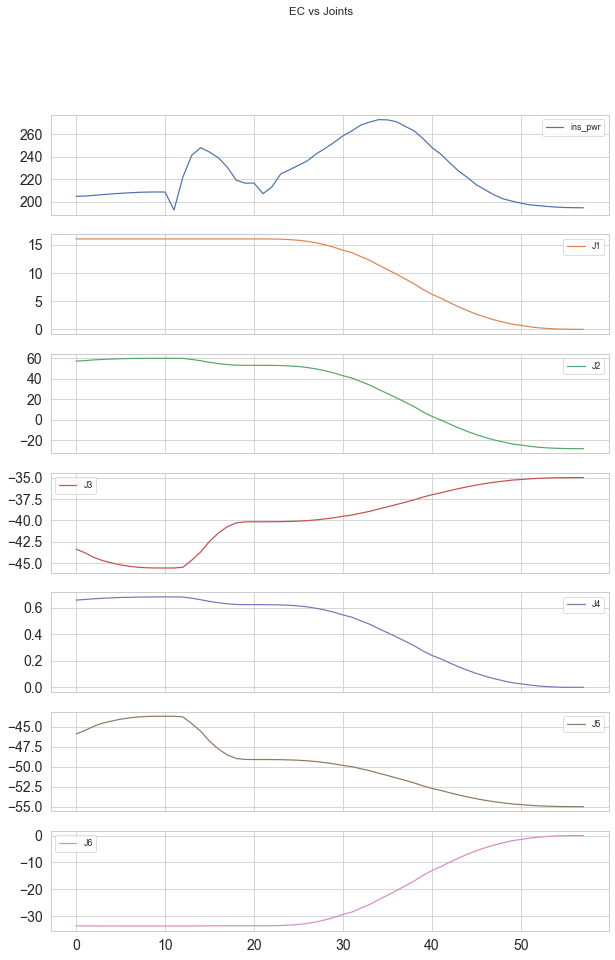

<IPython.core.display.Javascript object>

In [17]:
df[["ins_pwr", "J1", "J2", "J3", "J4", "J5", "J6"]].plot(
    subplots=True, sharex=True, figsize=(10, 15), fontsize=14, title="EC vs Joints"
)

plt.show()

In [18]:
print(df["ins_pwr"].values)

[204.688 204.949 205.618 206.243 206.882 207.372 207.864 208.286 208.503
 208.61  208.52  192.533 221.916 241.369 247.986 244.089 238.947 230.563
 219.047 216.423 216.541 207.079 213.155 224.728 228.446 232.37  236.378
 242.642 247.477 252.814 258.637 263.031 268.243 270.853 272.999 272.767
 271.11  266.877 262.934 255.916 248.057 242.165 234.411 227.122 221.23
 214.794 210.356 205.893 202.436 200.369 198.592 197.081 196.412 195.664
 195.094 194.765 194.597 194.542]


<IPython.core.display.Javascript object>

In [19]:
print(df["J1"].values)

[1.6016e+01 1.6016e+01 1.6016e+01 1.6016e+01 1.6016e+01 1.6016e+01
 1.6016e+01 1.6016e+01 1.6016e+01 1.6016e+01 1.6016e+01 1.6016e+01
 1.6016e+01 1.6016e+01 1.6016e+01 1.6016e+01 1.6016e+01 1.6016e+01
 1.6016e+01 1.6016e+01 1.6016e+01 1.6016e+01 1.6011e+01 1.5974e+01
 1.5896e+01 1.5783e+01 1.5587e+01 1.5317e+01 1.4967e+01 1.4534e+01
 1.4011e+01 1.3578e+01 1.2888e+01 1.2224e+01 1.1371e+01 1.0585e+01
 9.7610e+00 8.9110e+00 8.0480e+00 7.0420e+00 6.1940e+00 5.5070e+00
 4.7160e+00 3.9750e+00 3.2940e+00 2.6790e+00 2.1370e+00 1.6710e+00
 1.2790e+00 9.0400e-01 6.8700e-01 4.4600e-01 2.7000e-01 1.4700e-01
 6.8000e-02 2.4000e-02 5.0000e-03 0.0000e+00]


<IPython.core.display.Javascript object>

In [20]:
print(df["J2"].values)

[ 56.989  57.531  58.212  58.697  59.022  59.319  59.527  59.677  59.752
  59.778  59.781  59.779  59.673  58.611  57.396  55.817  54.58   53.646
  53.09   52.944  52.928  52.928  52.901  52.718  52.321  51.748  50.762
  49.395  47.627  45.438  42.796  40.609  37.124  33.766  29.457  25.485
  21.321  17.027  12.668   7.583   3.297  -0.175  -4.169  -7.912 -11.355
 -14.462 -17.204 -19.556 -21.539 -23.429 -24.524 -25.742 -26.636 -27.256
 -27.652 -27.874 -27.974 -28.   ]


<IPython.core.display.Javascript object>

In [21]:
print(df["J3"].values)

[-43.365 -43.793 -44.33  -44.712 -44.969 -45.203 -45.367 -45.485 -45.544
 -45.565 -45.567 -45.566 -45.482 -44.645 -43.687 -42.441 -41.466 -40.73
 -40.291 -40.176 -40.163 -40.163 -40.161 -40.15  -40.124 -40.088 -40.025
 -39.938 -39.825 -39.685 -39.517 -39.377 -39.155 -38.94  -38.666 -38.412
 -38.147 -37.873 -37.595 -37.27  -36.997 -36.775 -36.52  -36.282 -36.062
 -35.864 -35.689 -35.539 -35.412 -35.292 -35.222 -35.144 -35.087 -35.047
 -35.022 -35.008 -35.002 -35.   ]


<IPython.core.display.Javascript object>

In [22]:
print(df["J4"].values)

[0.657 0.662 0.667 0.671 0.674 0.677 0.678 0.68  0.68  0.681 0.681 0.681
 0.68  0.671 0.66  0.647 0.637 0.629 0.624 0.623 0.623 0.623 0.622 0.621
 0.618 0.613 0.606 0.595 0.582 0.565 0.545 0.528 0.501 0.475 0.442 0.411
 0.379 0.346 0.313 0.273 0.24  0.214 0.183 0.154 0.128 0.104 0.083 0.065
 0.049 0.035 0.026 0.017 0.01  0.005 0.002 0.    0.    0.   ]


<IPython.core.display.Javascript object>

In [23]:
print(df["J5"].values)

[-45.921 -45.493 -44.956 -44.574 -44.318 -44.083 -43.919 -43.801 -43.742
 -43.721 -43.719 -43.72  -43.804 -44.641 -45.599 -46.845 -47.82  -48.556
 -48.995 -49.11  -49.123 -49.123 -49.125 -49.138 -49.167 -49.209 -49.28
 -49.38  -49.508 -49.667 -49.859 -50.018 -50.271 -50.515 -50.827 -51.116
 -51.418 -51.73  -52.047 -52.416 -52.727 -52.979 -53.269 -53.541 -53.791
 -54.017 -54.216 -54.387 -54.531 -54.668 -54.748 -54.836 -54.901 -54.946
 -54.975 -54.991 -54.998 -55.   ]


<IPython.core.display.Javascript object>

In [24]:
print(df["J6"].values)

[-3.3726e+01 -3.3733e+01 -3.3742e+01 -3.3748e+01 -3.3752e+01 -3.3755e+01
 -3.3758e+01 -3.3760e+01 -3.3761e+01 -3.3761e+01 -3.3761e+01 -3.3761e+01
 -3.3760e+01 -3.3746e+01 -3.3731e+01 -3.3712e+01 -3.3696e+01 -3.3685e+01
 -3.3678e+01 -3.3676e+01 -3.3676e+01 -3.3676e+01 -3.3665e+01 -3.3589e+01
 -3.3424e+01 -3.3185e+01 -3.2774e+01 -3.2206e+01 -3.1470e+01 -3.0559e+01
 -2.9460e+01 -2.8550e+01 -2.7100e+01 -2.5702e+01 -2.3909e+01 -2.2256e+01
 -2.0524e+01 -1.8737e+01 -1.6923e+01 -1.4807e+01 -1.3023e+01 -1.1578e+01
 -9.9170e+00 -8.3590e+00 -6.9260e+00 -5.6330e+00 -4.4930e+00 -3.5140e+00
 -2.6880e+00 -1.9020e+00 -1.4460e+00 -9.3900e-01 -5.6700e-01 -3.0900e-01
 -1.4400e-01 -5.2000e-02 -1.1000e-02  0.0000e+00]


<IPython.core.display.Javascript object>